# 神经网络进行图像识别

数据集

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [1]:
import torch
import torchvision  # 数据集和预训练网络
import torch.utils.data
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor()])  #Compose将一些转换函数组合在一起，transforms.ToTensor把ndarray转换为tensor，Tensor为[c, h, w]格式
                                                        #transforms.Normalize((0.4914, 0.48216, 0.44653),(0.24703, 0.24349, 0.26159))

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./mydata', train=True, 
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./mydata', train=False, 
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, 
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, 
                                         shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
dir(testset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_is_protocol',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [8]:
testset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [3]:
#解决内核挂掉问题，无此问题可不运行
import os   
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"   

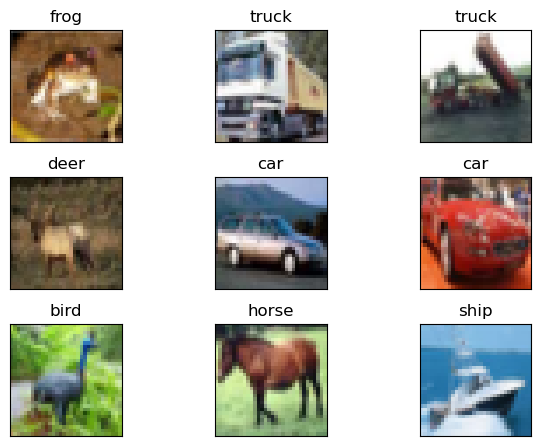

In [3]:
import numpy as np
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

x=0
for images, labels in trainset:
    plt.subplot(3,3,x+1)  #行数、列数和索引值，子图将分布在行列的索引位置上。索引从1开始，从左上角增加到右下角
    plt.tight_layout()    #自动调整子图参数，使之填充整个图像区域
    images = images.numpy().transpose(1, 2, 0)  # 把tensor转化为nympy,把channel那一维放到最后
    plt.title(str(classes[labels]))
    plt.imshow(images)
    plt.xticks([])  #不显示坐标轴
    plt.yticks([])
    x+=1
    if x==9:
        break
plt.show()

In [6]:
testloader.dataset
trainloader.dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./mydata
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./mydata
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
testloader.dataset.data.shape
trainloader.dataset.data.shape

(10000, 32, 32, 3)

(50000, 32, 32, 3)

In [11]:
testloader.dataset.data

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [7]:
testset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
testloader.batch_size
trainloader.sampler
testloader.sampler

32

定义网络网络

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 500) 
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        return self.fc2(x)

In [ ]:
#卷积神经网络模型
class Net2(nn.Module): 
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 24, 5, 1)
        self.conv2 = nn.Conv2d(24, 96, 5, 1)
        self.fc1 = nn.Linear(5 * 5 * 96, 500) 
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))   #28x28x24
        x = F.max_pool2d(x, 2, 2)   #14x14x24
        x = F.relu(self.conv2(x))   #10x10x96
        x = F.max_pool2d(x, 2, 2)  #5x5x96
        x = x.view(-1, 5*5*96)      
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

实例化模型，定义损失函数和优化器

In [10]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=3e-4)

训练

In [13]:
from tqdm import tqdm   #tqdm是一个进度条显示模块

for epoch in range(5): # 数据集的循环次数
    for i, data in enumerate(tqdm(trainloader), 0):
        # 获取输入       
        inputs, labels = data
       
        inputs = inputs.view(-1, 32 * 32 * 3)

        # 重置优化器
        optimizer.zero_grad()
        # 正向传播 + 反向传播 + loss计算
        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        # 梯度下降
        loss.backward()
        # 参数更行
        optimizer.step()
    print("epoch {0} Loss {1}".format(epoch,loss))

  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0000,  ..., 0.0078, 0.0078, 0.0078],
          [0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0078, 0.0078],
          ...,
          [0.0275, 0.0000, 0.0118,  ..., 0.0039, 0.0000, 0.0000],
          [0.0000, 0.0039, 0.0000,  ..., 0.0078, 0.0078, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0157, 0.0157, 0.0157],
          ...,
          [0.0196, 0.0000, 0.0039,  ..., 0.0039, 0.0039, 0.0000],
          [0.0000, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 

  0%|                                                                                         | 0/1563 [00:07<?, ?it/s]


NameError: name 'loss' is not defined

评测

In [12]:
correct, total = 0, 0
predictions = []
net.eval()     #将模型设置为测试模式
for i, data in enumerate(tqdm(testloader), 0):
    inputs, labels = data
    inputs = inputs.view(-1, 32 * 32 * 3)
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1) 
    predictions.append(outputs)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

Net(
  (fc1): Linear(in_features=3072, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [00:06<00:00, 46.07it/s]

The testing set accuracy of the network is: 45 %


## 作业
* 使用PyTorch搭建一个全连接神经网络，完成在 MNIST 或 CIFAR-10 上的训练和评测
* 可以尝试不同的网络结构和超参，尽量提高模型效果

*到此，我们虽然已经有能力对具体的问题建模训练和预测了，但是可能效果并不会很好，因为我们后面还会给大家讲到更powerful的网络结构，在此之前，也请大家积极练习，夯实基础方法和网络原理，加油！*